# Proyecto final


- Juan Carlos García #12002028
- Alejandra Rodas #18013406

## 1. Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

## 2. Carga y separación de datos

In [3]:
data = np.load('./../proyecto_training_data.npy')

In [4]:
dataset = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataset

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:

dataLen = dataset.shape[0]
print(dataLen , " - 100%")
print(dataLen * 0.8 , " - 80%")
print(dataLen * 0.20 , " - 20%")



dataTraining = dataset.iloc[0: int(dataLen * 0.80)]
print(dataTraining)

dataTest = dataset.iloc[int(dataLen * 0.80): dataLen]
print(dataTest)


1460  - 100%
1168.0  - 80%
292.0  - 20%
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]
      SaleP

## 3. Exploración de datos

In [6]:
dataTraining.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [7]:
dataTraining.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

In [8]:
dataTraining.shape
#(filas, columnas)

(1168, 6)

In [9]:
#variables dataset

describeall = dataTraining.describe()

print(describeall)


print('')

print('Rango')
print((describeall.loc['max'] - describeall.loc['min']))


print('')
print('Correlaciones con SalePrice')
correlation = dataTraining.corr(method='pearson').loc['SalePrice']
print(correlation )


           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   180590.277397     6.101027  1156.323630      6.485445  1971.451199   
std     78815.697902     1.378025   373.780374      1.609141    29.951707   
min     34900.000000     1.000000   334.000000      2.000000  1875.000000   
25%    129900.000000     5.000000   882.000000      5.000000  1954.000000   
50%    162950.000000     6.000000  1086.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1390.250000      7.000000  2000.000000   
max    755000.000000    10.000000  3228.000000     14.000000  2010.000000   

       LotFrontage  
count   962.000000  
mean     69.946985  
std      23.478161  
min      21.000000  
25%      59.000000  
50%      70.000000  
75%      80.000000  
max     313.000000  

Rango
SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt 

## 4. Histogramas para graficar variables (con Seaborn)

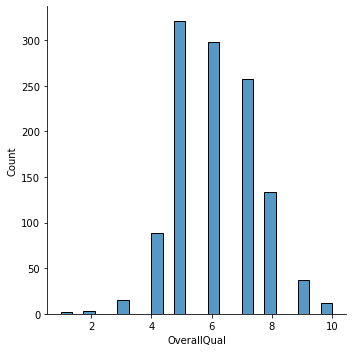

In [10]:
sns.displot(dataTraining.OverallQual)

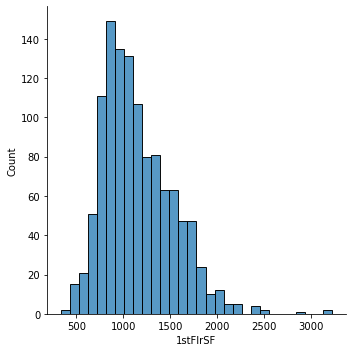

In [11]:
sns.displot(dataTraining['1stFlrSF'])

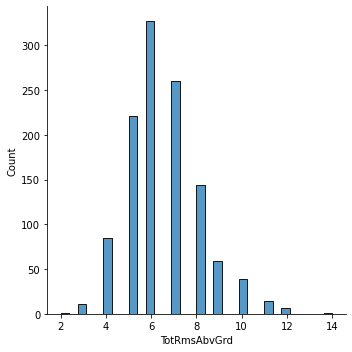

In [12]:
sns.displot(dataTraining.TotRmsAbvGrd)

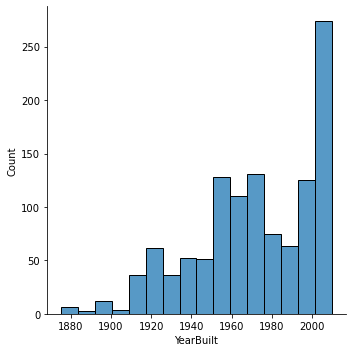

In [13]:
sns.displot(dataTraining.YearBuilt)

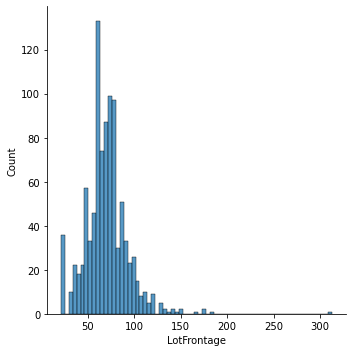

In [14]:
sns.displot(dataTraining.LotFrontage)

## 5. Scatter Plots con sus coeficientes de correlación

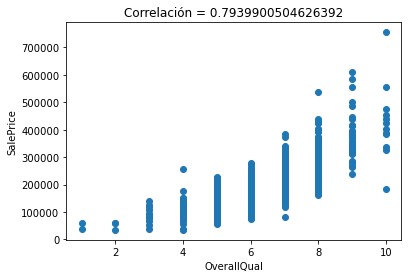

In [15]:
plt.scatter(dataTraining['OverallQual'], dataTraining['SalePrice'])
plt.title('Correlación = ' + str(correlation['OverallQual']))
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

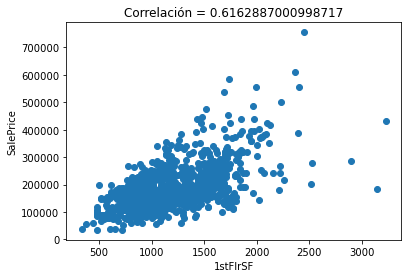

In [16]:
plt.scatter(dataTraining['1stFlrSF'], dataTraining['SalePrice'])
plt.title('Correlación = ' + str(correlation['1stFlrSF']))
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

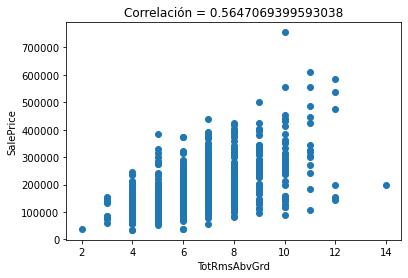

In [17]:
plt.scatter(dataTraining['TotRmsAbvGrd'], dataTraining['SalePrice'])
plt.title('Correlación = ' + str(correlation['TotRmsAbvGrd']))
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show

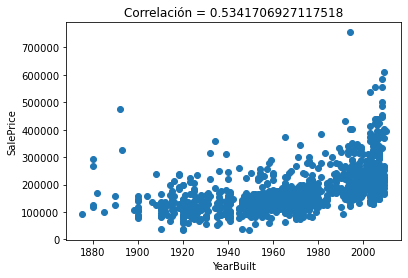

In [18]:
plt.scatter(dataTraining['YearBuilt'], dataTraining['SalePrice'])
plt.title('Correlación = ' + str(correlation['YearBuilt']))
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

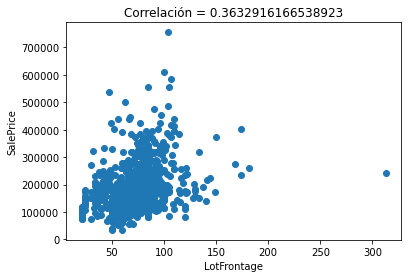

In [19]:
plt.scatter(dataTraining['LotFrontage'], dataTraining['SalePrice'])
plt.title('Correlación = ' + str(correlation['LotFrontage']))
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

variables elegidas:

1: OverallQual con corrcoef = 0.7940

2: 1stFlrSF con corrcoef = 0.6163

## 6 y 7. Crear la función para entrenar al modelo considerando todos los puntos del 7

In [20]:
def training(x, y, epochs, imprimirErrorCada, learningRate=1):
    errors = []
    betas = []
    betas.append([0,0]) # Inicializamos los betas con b1 = 1, b0 = 0
        
     #Creamos la matriz
    ones = np.ones_like(x)
    xMatrix = np.stack([x, ones], axis=1)
    i = 0
    while(i <= epochs):
        i +=1
        
        # Calculamos el "y" estimado
        yPredict = []
        yPredict = np.dot(xMatrix, betas[-1])
        
        
        # Calculamos el error
        error = sum( (y - yPredict)**2 ) / (2*yPredict.shape[0])
        errors.append(error)

        # calculamos el gradiente del error de cada beta
        gradient = np.dot( (yPredict - y), xMatrix ) / (yPredict.shape[0])

        # Calculamos los nuevos betas y los agregamos al arreglo
        newBetas1 = betas[-1][0] - (learningRate * gradient[0])
        newBetas0 = betas[-1][1] - (learningRate * gradient[1])
        betas.append([newBetas1, newBetas0])
        
        # Imprimimos cada imprimirErrorCada veces
        if(i%imprimirErrorCada == 0):
            print( "error: " + str(error) )

    
    # Devolvemos los betas y los errores
    return {'betas': betas, 'errors': errors}

In [21]:
def plotErrors(errors):
    errorsDf = pd.DataFrame(errors)
    plt.plot(errorsDf.index.tolist(), errorsDf[0].tolist(), color='red', marker='o', linestyle='dashed')
    plt.xlabel('Iteración')
    plt.ylabel('Error')

In [22]:
def plotFunction(dataX, dataY, betas, n):
    # Graficar los datos de entrenamiento
    colors = "bgrmykc"
    colorMaxIndex = 6
    plt.scatter(dataX, dataY,  c=colors[colorMaxIndex])
    
    #Graficar los betas
    ones = np.ones_like(dataX)
    xMatrix = np.stack([dataX, ones], axis=1)
    iterations = list(range(0, len(betas), n))
    i = 0
    while i < len(iterations):
        colorIndex = i%colorMaxIndex
        yPredict = np.dot(xMatrix, betas[iterations[i]])
        plt.scatter(dataX, yPredict,  c=colors[colorIndex], label=('iteration ' + str(i + 1) ))
        
        i += 1
    plt.legend()
        


    

## 7.2 Entrenar los modelos con las funciones creadas

### Modelo 1: OverallQual

error: 120502547628807.58
error: 7.289350476868438e+18
error: 4.409470367829417e+23
error: 2.667374684497858e+28


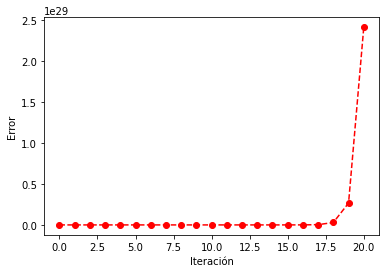

In [23]:
# Comenzamos con valores pequeños
x1 = dataTraining['OverallQual'].values
y1 = dataTraining['SalePrice'].values

results = training(x=x1, y=y1, epochs=20, imprimirErrorCada=5, learningRate=0.1)
plotErrors( results['errors'] )

# Nos damos cuenta que cada vez el error van aumentando

error: 3.106603191922864e+20
error: 1.941339838776433e+33
error: 1.2131579531739768e+46
error: 7.581115835323809e+58


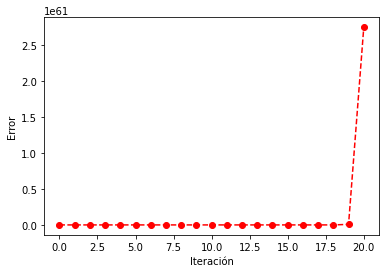

In [24]:
# aumentamos el valor learningRate
results = training(x=x1, y=y1, epochs=20, imprimirErrorCada=5, learningRate=0.5)
plotErrors( results['errors'] )
# El error es todavía más grande

error: 1693499585.3201873
error: 1394454395.523841
error: 1391513812.4658074
error: 1390347591.754983


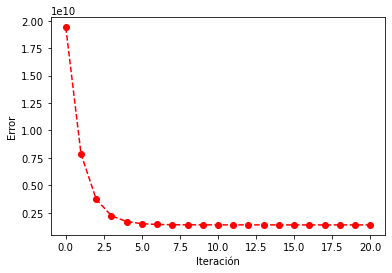

In [25]:
# Disminuimos el valor learningRate
results = training(x=x1, y=y1, epochs=20, imprimirErrorCada=5, learningRate=0.01)
plotErrors( results['errors'] )
# Vemos como con un valor muy pequeño de learningRate el error comienza a disminuir

error: 1243133294.591419
error: 1184232714.1805434
error: 1161388918.5757
error: 1152529260.58938
error: 1149093161.7469497
error: 1147760517.160311
error: 1147243668.9333708
error: 1147043216.3202968
error: 1146965473.4782102
error: 1146935321.9655795


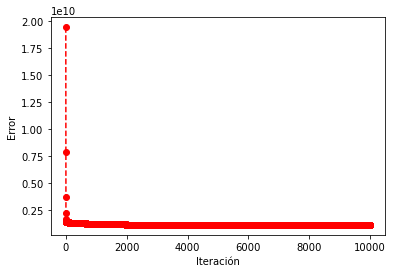

In [26]:
# Realizamos más iteraciones
results = training(x=x1, y=y1, epochs=10000, imprimirErrorCada=1000, learningRate=0.01)
plotErrors( results['errors'] )
# A partir de la iteración 60000, aproximadamente, el error ya no disminure tanto

error: 1243133294.591419
error: 1184232714.1805434
error: 1161388918.5757
error: 1152529260.58938
error: 1149093161.7469497
error: 1147760517.160311
error: 1147243668.9333708
error: 1147043216.3202968
error: 1146965473.4782102
error: 1146935321.9655795


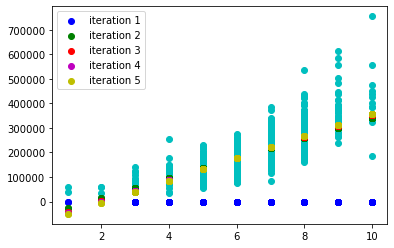

In [27]:
results = training(x=x1, y=y1, epochs=10000, imprimirErrorCada=1000, learningRate=0.01)
plotFunction(x1, y1, results['betas'], 2500)
# vemos como las iteraciones de la dos en adelante son muy parecidas

### Modelo 2: 1stFlrSF

In [28]:
# Cuidado! Tenemos que sacar los nan s para que pueda operar

#Vamos a utilizar los mismos valores para entrenar el modelo de LotFrontage
dataTraining2 = dataTraining
dataTraining2 = dataTraining2[pd.notna(dataTraining2['1stFlrSF'])]
x2 = dataTraining2['1stFlrSF'].values
y2 = dataTraining2['SalePrice'].values
results2 = training(x=x2, y=y2, epochs=10000, imprimirErrorCada=1000, learningRate=0.01)

# El modelo no converge

<ipython-input-20-d6bde9d87378>:19: RuntimeWarning: overflow encountered in square
  error = sum( (y - yPredict)**2 ) / (2*yPredict.shape[0])
<ipython-input-20-d6bde9d87378>:26: RuntimeWarning: invalid value encountered in double_scalars
  newBetas1 = betas[-1][0] - (learningRate * gradient[0])
<ipython-input-20-d6bde9d87378>:27: RuntimeWarning: invalid value encountered in double_scalars
  newBetas0 = betas[-1][1] - (learningRate * gradient[1])


error: nan
error: nan
error: nan
error: nan
error: nan
error: nan
error: nan
error: nan
error: nan
error: nan


error: 7.508416822335341e+21
error: 6.780859705831177e+34
error: 6.123802052838697e+47
error: 5.5304125449023175e+60
error: 4.994521810618503e+73
error: 4.5105582837101734e+86
error: 4.0734902763848246e+99
error: 3.678773665718586e+112
error: 3.3223046491705893e+125
error: 3.0003770780349375e+138


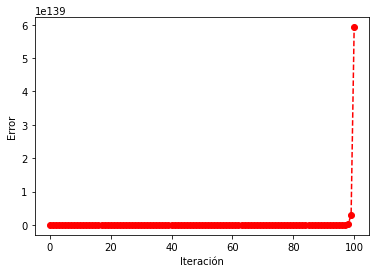

In [29]:
#Vamos a disminuir el learningRate y reducir el número de iteraciones
dataTraining2 = dataTraining
dataTraining2 = dataTraining2[pd.notna(dataTraining2['LotFrontage'])]
x2 = dataTraining2['LotFrontage'].values
y2 = dataTraining2['SalePrice'].values
results2 = training(x=x2, y=y2, epochs=100, imprimirErrorCada=10, learningRate=0.001)
plotErrors( results2['errors'] )

# El modelo no converge, no nos da error, pero nos damos cuenta que nunca se va a llegar a estabilizar

error: 3427363641.405282
error: 3427267618.892373
error: 3427183353.429665
error: 3427099105.0132604
error: 3427014873.6379623
error: 3426930659.300334
error: 3426846461.9969234
error: 3426762281.724287
error: 3426678118.4789796
error: 3426593972.257553


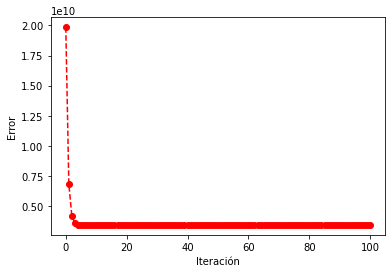

In [31]:
#Vamos a disminuir el learningRate
dataTraining2 = dataTraining
dataTraining2 = dataTraining2[pd.notna(dataTraining2['LotFrontage'])]
x2 = dataTraining2['LotFrontage'].values
y2 = dataTraining2['SalePrice'].values
results2 = training(x=x2, y=y2, epochs=100, imprimirErrorCada=10, learningRate=0.0001)
plotErrors( results2['errors'] )

# Nos damos cuenta que el modelo comienza a converger

error: 3419090094.645331
error: 3410911127.67753
error: 3402895952.919628
error: 3395041290.2644897
error: 3387343925.2924666
error: 3379800707.955981
error: 3372408551.2903924
error: 3365164430.1506734
error: 3358065379.9734607
error: 3351108495.563795


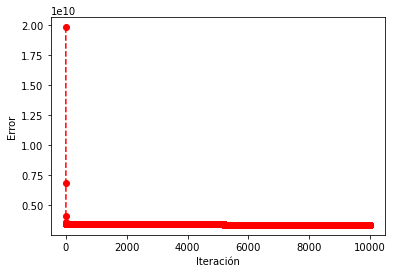

In [32]:
#Aumentamos el número de iteraciones
dataTraining2 = dataTraining
dataTraining2 = dataTraining2[pd.notna(dataTraining2['LotFrontage'])]
x2 = dataTraining2['LotFrontage'].values
y2 = dataTraining2['SalePrice'].values
results2 = training(x=x2, y=y2, epochs=10000, imprimirErrorCada=1000, learningRate=0.0001)
plotErrors( results2['errors'] )

# Nos damos cuenta que el modelo comienza a converger

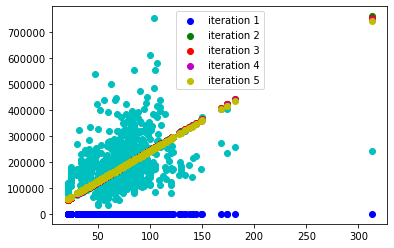

In [33]:
plotFunction(x2, y2, results2['betas'], 2500)

## 7.3 Entrenar los modelos sklearn

In [34]:
lm1 = LinearRegression()
x1rs = x1.reshape(-1,1)
y1rs = y1.reshape(-1,1)

lm2 = LinearRegression()
x2rs = x2.reshape(-1,1)
y2rs = y2.reshape(-1,1)

lm1.fit(x1rs, y1rs)
lm2.fit(x2rs, y2rs)

b1m1 = lm1.coef_
b0m1 = lm1.intercept_

b1m2 = lm2.coef_
b0m2 = lm2.intercept_


print(b0m1[0], b1m1[0][0] )
print( results['betas'][-1][1])
print( results['betas'][-1][0])



-96469.57131873982 45411.998779159156
-95582.8848827753
45273.54600365441


## 7.4 Usar el modelo entrenado por nuestra función y por skleand

In [35]:
def useFunctions(x, b0sk, b1sk, b0mf, b1mf, vector ):
    
    ones = np.ones_like(x)
    xMatrix = np.stack([x, ones], axis=1)    
    ySkPredict = np.dot(xMatrix, [b1sk, b0sk])
    yMyPredict = np.dot(xMatrix, [b1mf, b0mf])
        
    ySkPredict = ySkPredict[0: len(vector)]
    yMyPredict = yMyPredict[0: len(vector)]
    
    yprom = (yMyPredict + ySkPredict)/2
    
    return { "myPredict": yMyPredict, "skPredict": ySkPredict, "prom": yprom }

In [47]:
xb1 = dataTest['OverallQual'].values
yb1 = dataTest['SalePrice'].values

dataTest2 = dataTest
dataTest2 = dataTest2[pd.notna(dataTest2['LotFrontage'])]
xb2 = dataTest2['LotFrontage'].values
yb2 = dataTest2['SalePrice'].values


use1 = useFunctions(xb1, b0m1[0], b1m1[0][0], results['betas'][-1][1], results['betas'][-1][0], list(range(0,292)) )
use2 = useFunctions(xb2, b0m2[0], b1m2[0][0], results2['betas'][-1][1], results2['betas'][-1][0], list(range(0,292)) )


# print(use1['myPredict'])
# print(use1['skPredict'])
# print(use1['prom'])

# print(use2['myPredict'])
# print(use2['skPredict'])
# print(use2['prom'])

876352.0357516436


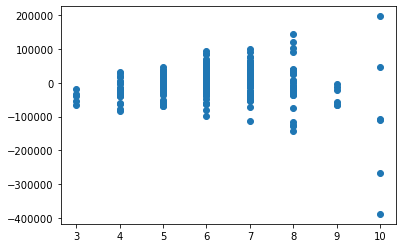

In [48]:
#Error Mi modelo 1
errorMy1 = sum( (use1['myPredict'] - yb1)**2 )
print( math.sqrt(errorMy1) )
plt.scatter(xb1, (use1['myPredict'] - yb1))

1360410.559396289


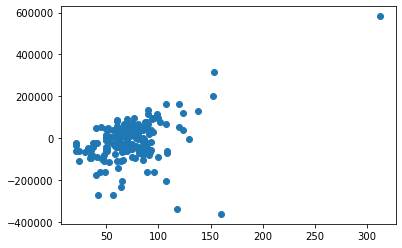

In [43]:
#Error Mi modelo 2
errorMy2 = sum( (use2['myPredict'] - yb2)**2 )
print( math.sqrt(errorMy2) )
plt.scatter(xb2, (use2['myPredict'] - yb2))

876363.6926601892


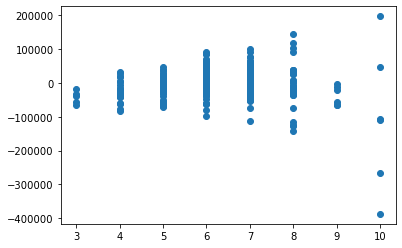

In [44]:
#Error modelo SkLearn 1

errorSk1 = sum( (use1['skPredict'] - yb1)**2 )
print( math.sqrt(errorSk1) )
plt.scatter(xb1, (use1['skPredict'] - yb1))

1234559.4001026065


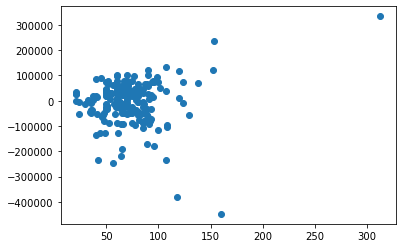

In [45]:
#Error modelo SkLearn 2
errorSk2 = sum( (use2['skPredict'] - yb2)**2 )
print( math.sqrt(errorSk2) )
plt.scatter(xb2, (use2['skPredict'] - yb2))



In [ ]:
# El mejor modelo fue el que construimos con OverallQual

In [ ]:
errorMy1 = use1['myPredict'] - 

In [268]:
# parametros

x = dataTraining['OverallQual'].values
y = dataTraining['SalePrice'].values
learning_rate = 0.01
epoch = 10000
b0 = 0
b1 = 0
n = len(x)

for i in range(epoch):
    yhat = b0 + b1 * x
    gradb1 = 1/n*np.sum((yhat - y) * x)
    gradb0 = 1/n*np.sum((yhat - y))
    b0 = b0 - learning_rate*gradb0
    b1 = b1 - learning_rate*gradb1

print('b0: {}, b1: {}'.format(b0, b1))

b0: -95582.46486131243, b1: 45273.480418871615


In [255]:
x = dataTraining['OverallQual'].values.reshape(-1,1)
y = dataTraining['SalePrice'].values.reshape(-1,1)

In [226]:
dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)

In [227]:
lm1 = LinearRegression()
lm1.fit(dataTrain, dataTrain_Sales)

LinearRegression()

In [230]:
# β1
lm1.coef_

array([[44991.37057353]])

In [231]:
# β0

lm1.intercept_

array([-95594.1953882])

<function matplotlib.pyplot.show(close=None, block=None)>

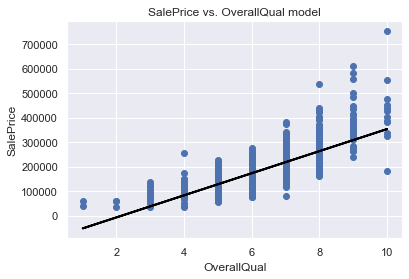

In [242]:
# modelo

y_predict_from_train = lm1.predict(dataTrain)
y_predict_from_train

plt.scatter(dataTraining['OverallQual'], dataTraining['SalePrice'])
plt.plot(dataTrain, y_predict_from_train, color="black", linewidth=2)
plt.title("SalePrice vs. OverallQual model")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show

In [241]:
# error

lm1.score(dataTrain, dataTrain_Sales)

0.6314007722928174

In [246]:
# rmse

y_predicts_test = lm1.predict(dataTest)
rmse = math.sqrt(metrics.mean_squared_error(dataTest_Sales, y_predicts_test))
rmse

50526.68210610892

In [257]:
yhat

array([0., 0., 0., ..., 0., 0., 0.])